# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [189]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [190]:
# Import the libraries
import numpy as np
import pandas as pd

### **1.1 Load the Data**

In [191]:
# Load the dataset
employee_data = pd.read_csv("Employee_data.csv")

In [192]:
# Check the first few entries
employee_data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


In [193]:
# Inspect the shape of the dataset
employee_data.shape

(74610, 24)

In [194]:
# Inspect the different columns in the dataset
employee_data.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

### **1.2 Check the basic statistics**

In [195]:
# Check the summary of the dataset
employee_data.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months)
count,74610.000000,74610.000000,74610.000000,74610.000000,74610.000000,72698.000000,74610.000000,72197.000000
mean,37246.028696,38.529379,15.722638,7344.931417,0.832958,49.990839,1.657432,55.711899
std,21505.785344,12.082299,11.224059,2596.373589,0.995326,28.519135,1.579862,25.392325
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18624.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37239.500000,39.000000,13.000000,7348.500000,1.000000,50.000000,1.000000,56.000000
75%,55871.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,50030.000000,4.000000,99.000000,15.000000,128.000000


### **1.3 Check the data type of columns**

In [196]:
# Check the info to see the types of the feature variables and the null values present
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [197]:
# Check the number of missing values in each column
employee_data.isnull().sum()

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [198]:
# Check the percentage of missing values in each column
(employee_data.isnull().sum() / len(employee_data)) * 100

Employee ID                   0.000000
Age                           0.000000
Gender                        0.000000
Years at Company              0.000000
Job Role                      0.000000
Monthly Income                0.000000
Work-Life Balance             0.000000
Job Satisfaction              0.000000
Performance Rating            0.000000
Number of Promotions          0.000000
Overtime                      0.000000
Distance from Home            2.562659
Education Level               0.000000
Marital Status                0.000000
Number of Dependents          0.000000
Job Level                     0.000000
Company Size                  0.000000
Company Tenure (In Months)    3.234151
Remote Work                   0.000000
Leadership Opportunities      0.000000
Innovation Opportunities      0.000000
Company Reputation            0.000000
Employee Recognition          0.000000
Attrition                     0.000000
dtype: float64

2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [199]:
# Handle the missing value rows in the column
# We'll fill numerical missing values with the median
employee_data["Distance from Home"].fillna(employee_data["Distance from Home"].median(), inplace=True)
employee_data["Company Tenure (In Months)"].fillna(employee_data["Company Tenure (In Months)"].median(), inplace=True)

2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [200]:
# Check the percentage of remaining data after missing values are handled
(employee_data.isnull().sum() / len(employee_data)) * 100

Employee ID                   0.0
Age                           0.0
Gender                        0.0
Years at Company              0.0
Job Role                      0.0
Monthly Income                0.0
Work-Life Balance             0.0
Job Satisfaction              0.0
Performance Rating            0.0
Number of Promotions          0.0
Overtime                      0.0
Distance from Home            0.0
Education Level               0.0
Marital Status                0.0
Number of Dependents          0.0
Job Level                     0.0
Company Size                  0.0
Company Tenure (In Months)    0.0
Remote Work                   0.0
Leadership Opportunities      0.0
Innovation Opportunities      0.0
Company Reputation            0.0
Employee Recognition          0.0
Attrition                     0.0
dtype: float64

### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [201]:
# Write a function to display the categorical columns with their unique values and check for redundant values
def categorical_columns_info(data):
    cat_cols = data.select_dtypes(include='object').columns
    for col in cat_cols:
        print(f"{col} - Unique values:")
        print(data[col].unique())
        print("-" * 50)

categorical_columns_info(employee_data)

Gender - Unique values:
['Male' 'Female']
--------------------------------------------------
Job Role - Unique values:
['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
--------------------------------------------------
Work-Life Balance - Unique values:
['Excellent' 'Poor' 'Good' 'Fair']
--------------------------------------------------
Job Satisfaction - Unique values:
['Medium' 'High' 'Very High' 'Low']
--------------------------------------------------
Performance Rating - Unique values:
['Average' 'Low' 'High' 'Below Average']
--------------------------------------------------
Overtime - Unique values:
['No' 'Yes']
--------------------------------------------------
Education Level - Unique values:
['Associate Degree' 'Masterâ€™s Degree' 'Bachelorâ€™s Degree'
 'High School' 'PhD']
--------------------------------------------------
Marital Status - Unique values:
['Married' 'Divorced' 'Single']
--------------------------------------------------
Job Level - Unique values:
['

In [202]:
# Fix encoding issues
employee_data["Education Level"] = employee_data["Education Level"].replace({
    "Masterâ€™s Degree": "Master's Degree",
    "Bachelorâ€™s Degree": "Bachelor's Degree"
})

In [203]:
# Check the data
employee_data

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74605,13450,44,Female,20,Healthcare,7578,Fair,Medium,Low,2,...,3,Mid,Large,52.0,No,No,No,Fair,Very High,Left
74606,2386,45,Male,26,Technology,8342,Excellent,Very High,Below Average,3,...,4,Mid,Medium,56.0,Yes,No,No,Poor,High,Stayed
74607,36968,28,Female,3,Technology,9763,Poor,Low,Average,0,...,3,Senior,Small,67.0,No,No,No,Poor,Medium,Left
74608,24276,37,Male,3,Education,3644,Fair,High,Average,2,...,4,Entry,Medium,16.0,No,No,No,Excellent,Medium,Stayed


### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [204]:
# Drop redundant columns which are not required for modelling
employee_data.drop(columns=["Employee ID"], inplace=True)

In [205]:
# Check first few rows of data
employee_data.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,59,Female,4,Media,5534,Poor,High,Low,3,No,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,24,Female,10,Healthcare,8159,Good,High,Low,0,No,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,36,Female,7,Education,3989,Good,High,High,1,No,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [206]:
# Import Train Test Split
from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [207]:
# Put all the feature variables in X
X = employee_data.drop(columns=["Attrition"])
# Put the target variable in y
y = employee_data["Attrition"]

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [208]:
# Split the data into 70% train data and 30% validation data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [209]:
# Select numerical columns
# Combine X_train and y_train for EDA
train_data = X_train.copy()
train_data['Attrition'] = y_train
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns

4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

In [210]:
# Plot all the numerical columns to understand their distribution

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt


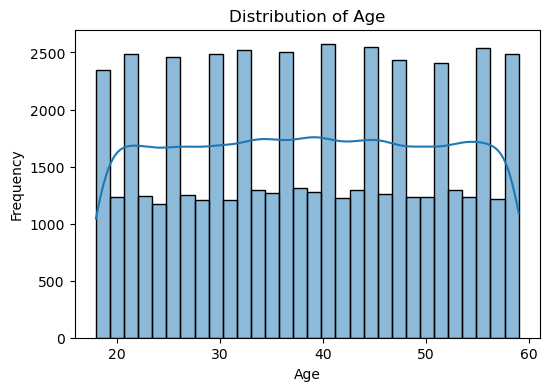

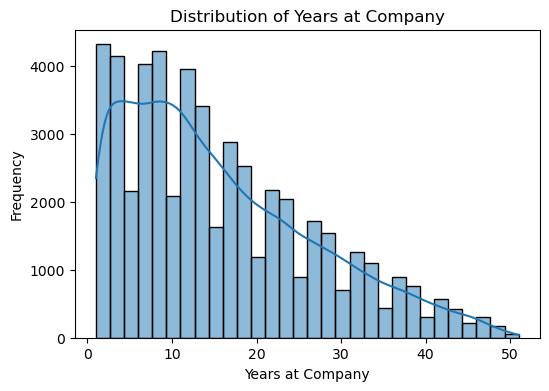

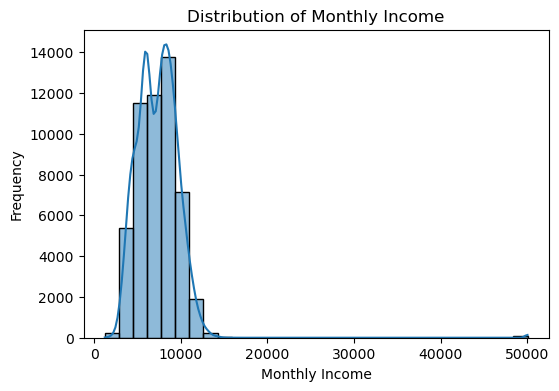

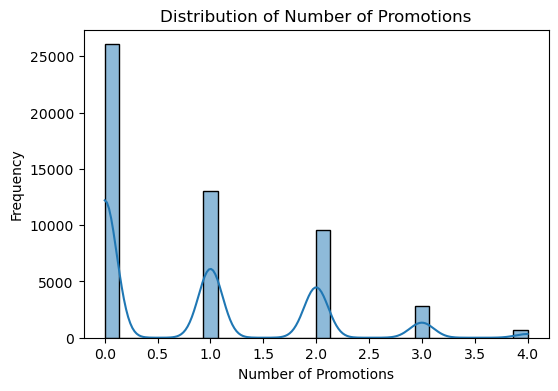

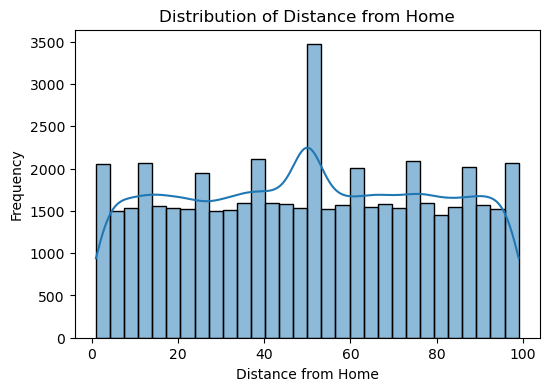

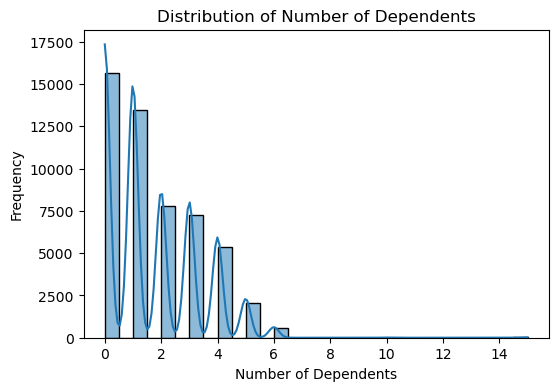

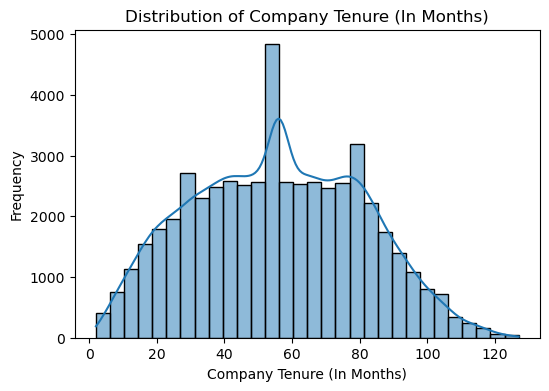

In [211]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(train_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

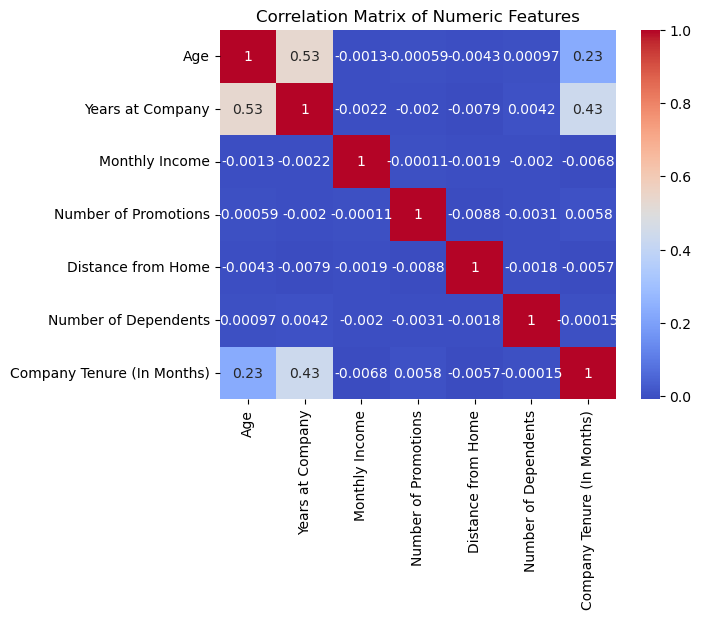

In [212]:
# Create correlation matrix for numerical columns
corr_matrix = train_data[numerical_cols].corr()

# Plot Heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()


### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

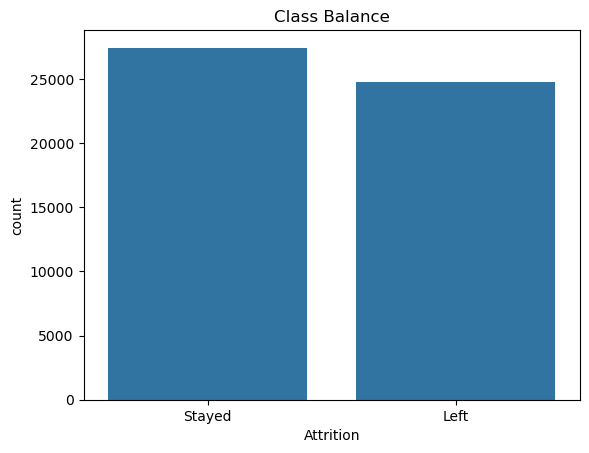

In [213]:
# Plot a bar chart to check class balance
sns.countplot(data=train_data, x='Attrition')
plt.title("Class Balance")
plt.show()

### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

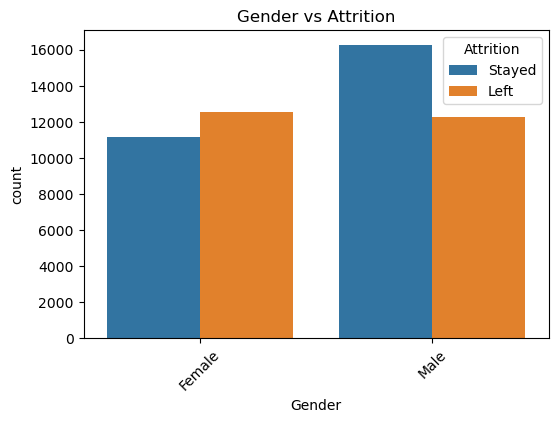

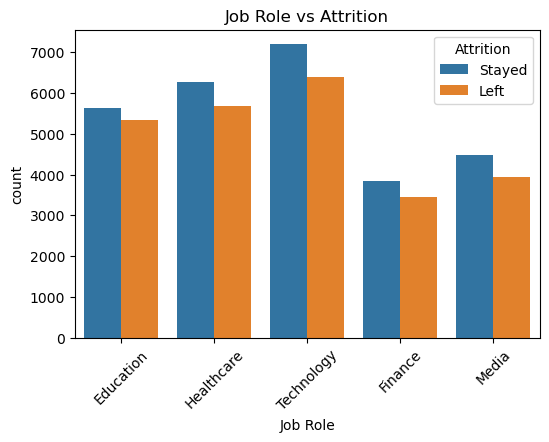

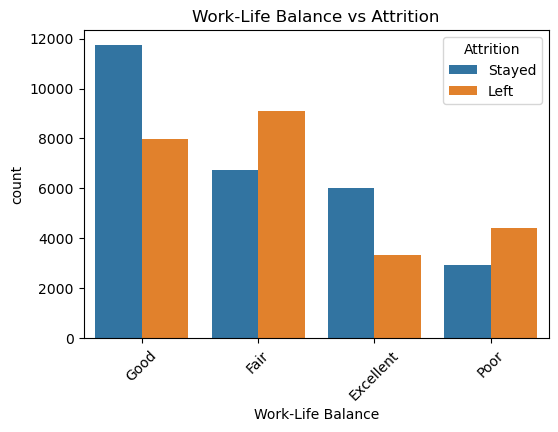

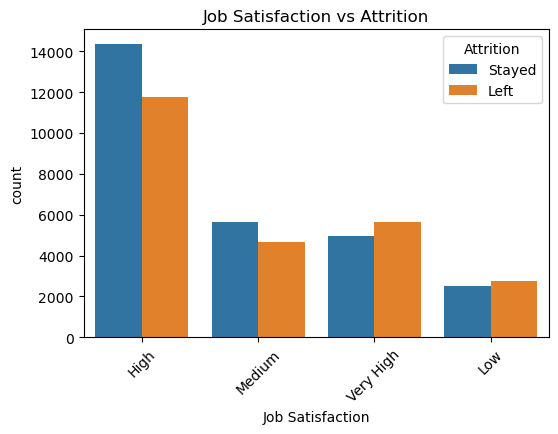

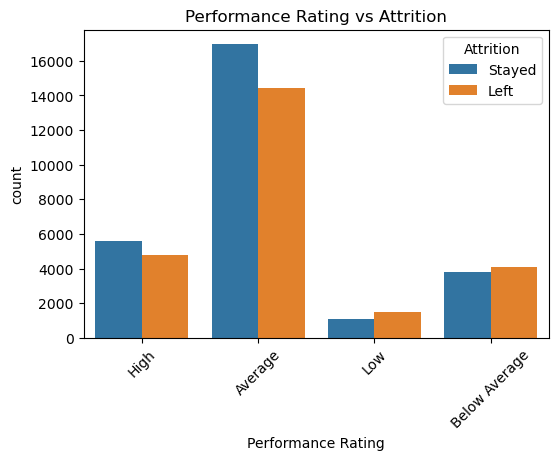

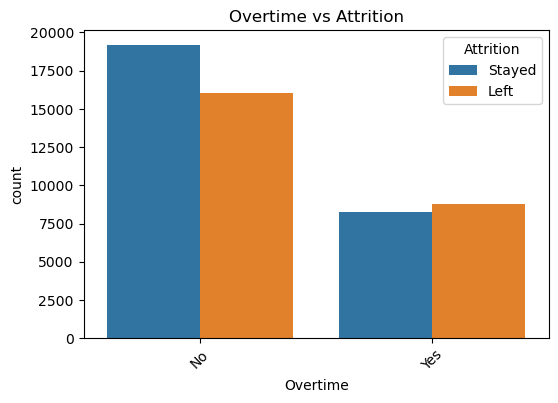

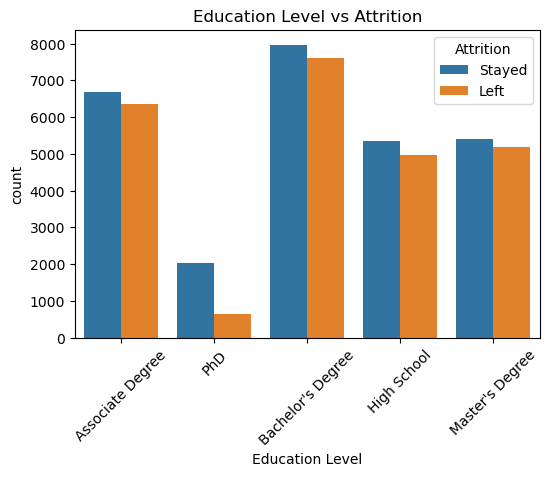

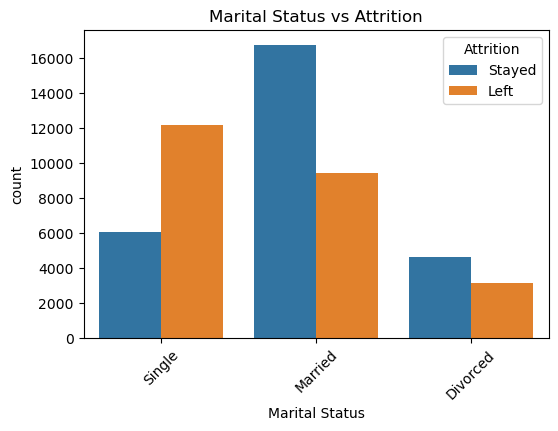

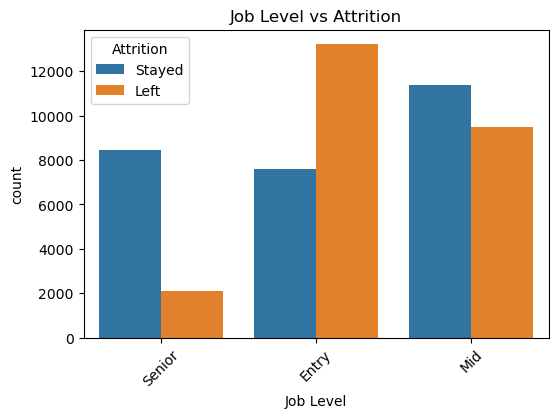

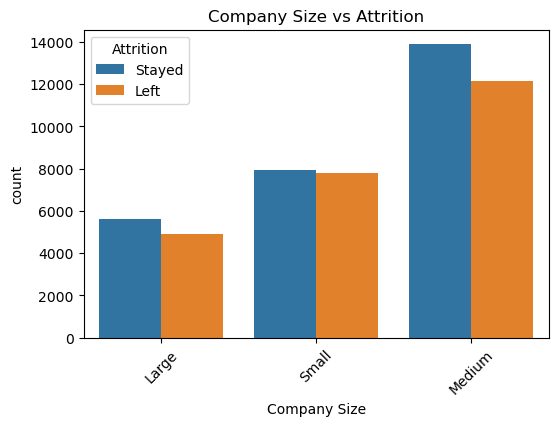

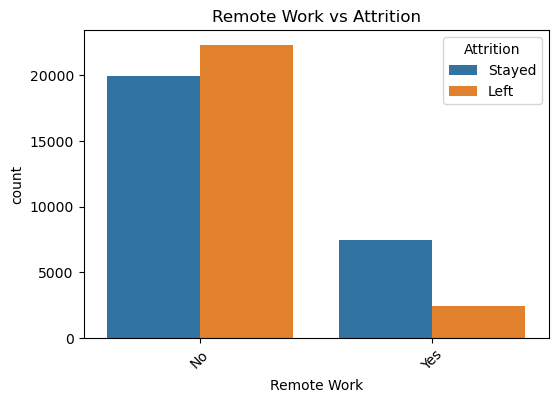

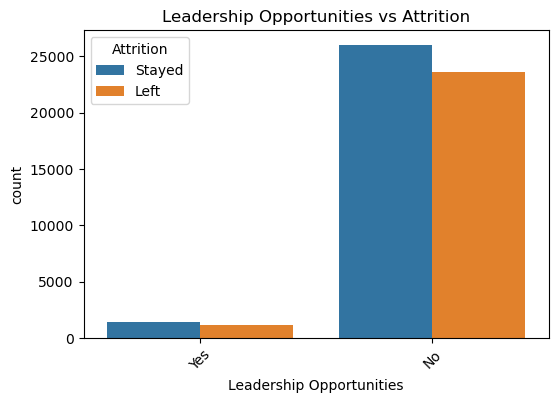

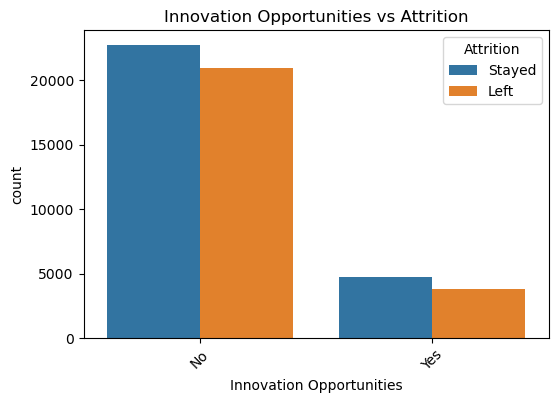

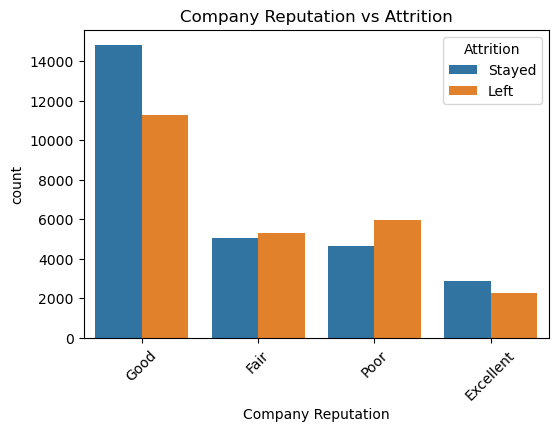

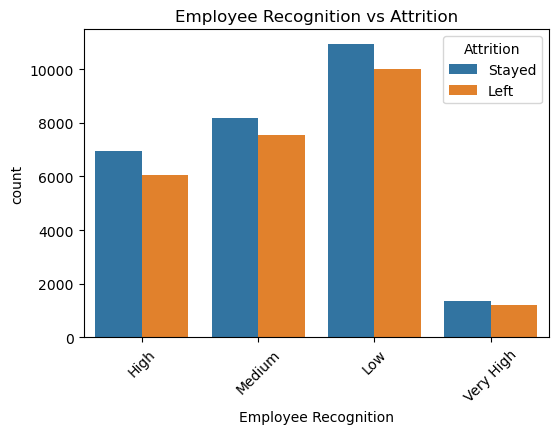

In [214]:
# Plot distribution for each categorical column with target variable

# Select key categorical variables
categorical_cols = [
    'Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
    'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
    'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
    'Innovation Opportunities', 'Company Reputation', 'Employee Recognition'
]
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=train_data, x=col, hue='Attrition')
    plt.title(f'{col} vs Attrition')
    plt.xticks(rotation=45)
    plt.show()

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [215]:
# Select numerical columns


5.1.2 Plot distribution of numerical columns

In [216]:
# Plot all the numerical columns to understand their distribution


### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

In [217]:
# Create correlation matrix for numerical columns

# Plot Heatmap of the correlation matrix


### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

In [218]:
# Plot a bar chart to check class balance


### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

In [219]:
# Plot distribution for each categorical column with target variable


## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [228]:
# Check the categorical columns
cat_cols = X_train.select_dtypes(include='object').columns
print("Categorical columns:", list(cat_cols))

Categorical columns: ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']


6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [229]:
# Create dummy variables using the 'get_dummies' for independent columns
X_train_dummies = pd.get_dummies(X_train[cat_cols], drop_first=True)

# Add the results to the master DataFrame (combining to a new dataframe)
X_train_final = pd.concat([X_train.drop(columns=cat_cols).reset_index(drop=True), 
                           X_train_dummies.reset_index(drop=True)], axis=1)

Now, drop the original categorical columns and check the DataFrame

In [230]:
# Drop the original categorical columns and check the DataFrame
# categorical columns are already dropped thus just printing
print("Transformed training data:")
print(X_train_final.head())

Transformed training data:
   Age  Years at Company  Monthly Income  Number of Promotions  \
0   25                 1            4207                     2   
1   26                13            9601                     0   
2   35                19            5415                     0   
3   21                 9            8258                     0   
4   53                24            6015                     1   

   Distance from Home  Number of Dependents  Company Tenure (In Months)  \
0                 6.0                     5                        78.0   
1                14.0                     0                        83.0   
2                10.0                     3                        48.0   
3                50.0                     5                        16.0   
4                13.0                     0                        79.0   

   Gender_Male  Job Role_Finance  Job Role_Healthcare  ...  \
0        False             False                False  ...   
1

6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [231]:
# Create dummy variables using the 'get_dummies' for independent columns
X_val_dummies = pd.get_dummies(X_val[cat_cols], drop_first=True)

# Add the results to the master DataFrame (combining into a new dataframe)
X_val_final = pd.concat([X_val.drop(columns=cat_cols).reset_index(drop=True), 
                         X_val_dummies.reset_index(drop=True)], axis=1)

Now, drop the original categorical columns and check the DataFrame

In [232]:
# Drop categorical columns and check the DataFrame
# categorical columns are already dropped thus just printing
print("Transformed validation data:")
print(X_val_final.head())

Transformed validation data:
   Age  Years at Company  Monthly Income  Number of Promotions  \
0   45                 9           10454                     0   
1   44                10            3670                     0   
2   24                 5            6663                     0   
3   41                10            6042                     0   
4   44                16            7801                     1   

   Distance from Home  Number of Dependents  Company Tenure (In Months)  \
0                25.0                     2                        87.0   
1                64.0                     0                        89.0   
2                18.0                     1                        65.0   
3                84.0                     0                        52.0   
4                 7.0                     5                        36.0   

   Gender_Male  Job Role_Finance  Job Role_Healthcare  ...  \
0         True              True                False  ...   

6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [233]:
# Convert y_train and y_validation to DataFrame to create dummy variables
y_train_df = y_train.reset_index(drop=True).to_frame()
y_val_df = y_val.reset_index(drop=True).to_frame()

6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [234]:
# Create dummy variables using the 'get_dummies' for dependent column
y_train_dummies = pd.get_dummies(y_train_df, drop_first=True)

6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [235]:
# Create dummy variables using the 'get_dummies' for dependent column
y_val_dummies = pd.get_dummies(y_val_df, drop_first=True)

6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [236]:
# Drop redundant columns from both train and validation
X_train_final.drop(columns=cat_cols, inplace=True, errors='ignore')
X_val_final.drop(columns=cat_cols, inplace=True, errors='ignore')

### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [237]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import StandardScaler

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [238]:
scaler = StandardScaler()

# Scale the numeric features present in the training set
num_cols = X_train_final.select_dtypes(include=['int64', 'float64']).columns
X_train_final[num_cols] = scaler.fit_transform(X_train_final[num_cols])

# Scale the numerical features present in the validation set
X_val_final[num_cols] = scaler.transform(X_val_final[num_cols])


## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [239]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression

# Base model
logreg = LogisticRegression()

7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [240]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)
rfe.fit(X_train_final, y_train_dummies.values.ravel())

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [241]:
# Display the features selected by RFE
selected_columns = X_train_final.columns[rfe.support_]
print("Selected Features by RFE:")
print(selected_columns.tolist())

Selected Features by RFE:
['Gender_Male', 'Work-Life Balance_Fair', 'Work-Life Balance_Poor', 'Job Satisfaction_Low', 'Job Satisfaction_Very High', 'Performance Rating_Below Average', 'Performance Rating_Low', 'Overtime_Yes', 'Education Level_PhD', 'Marital Status_Single', 'Job Level_Mid', 'Job Level_Senior', 'Remote Work_Yes', 'Company Reputation_Fair', 'Company Reputation_Poor']


7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [242]:
# Put columns selected by RFE into variable 'col'
col = selected_columns

### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [243]:
# Select only the columns selected by RFE
X_train_rfe = X_train_final[col]
X_val_rfe = X_val_final[col]

In [244]:
# View the training data
print("Training data with selected features:")
print(X_train_rfe.head())

Training data with selected features:
   Gender_Male  Work-Life Balance_Fair  Work-Life Balance_Poor  \
0        False                   False                   False   
1         True                    True                   False   
2        False                   False                   False   
3         True                   False                   False   
4         True                    True                   False   

   Job Satisfaction_Low  Job Satisfaction_Very High  \
0                 False                       False   
1                 False                       False   
2                 False                       False   
3                 False                       False   
4                 False                       False   

   Performance Rating_Below Average  Performance Rating_Low  Overtime_Yes  \
0                             False                   False         False   
1                             False                   False         False   
2  

7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [245]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_rfe)  # add a constant (intercept) column

7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [154]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
# Filter selected features for train and validation sets
X_train_selected = X_train_final[selected_columns]
X_val_selected = X_val_final[selected_columns]

logreg_model = LogisticRegression()
logreg_model.fit(X_train_selected, y_train_dummies.values.ravel())  # .values.ravel() flattens the y to 1D

LogisticRegression()

In [246]:
print("Logistic Regression model trained successfully on selected features.")

Logistic Regression model trained successfully on selected features.


**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [247]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [249]:
X_train_selected.shape

(52227, 15)

In [253]:
# Ensure only numeric columns are used for VIF
X_train_selected = X_train_selected.astype(int)
X_train_numeric = X_train_selected.select_dtypes(include=[np.number, 'bool'])

# Add constant
X_vif = sm.add_constant(X_train_numeric)

# Create DataFrame for VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i + 1) for i in range(len(X_train_numeric.columns))]

# Show VIF values
print("VIF for selected features:")
print(vif_data)

VIF for selected features:
                             Feature       VIF
0                        Gender_Male  1.000381
1             Work-Life Balance_Fair  1.076713
2             Work-Life Balance_Poor  1.076688
3               Job Satisfaction_Low  1.029559
4         Job Satisfaction_Very High  1.029529
5   Performance Rating_Below Average  1.009494
6             Performance Rating_Low  1.009900
7                       Overtime_Yes  1.000330
8                Education Level_PhD  1.000265
9              Marital Status_Single  1.000406
10                     Job Level_Mid  1.202781
11                  Job Level_Senior  1.202642
12                   Remote Work_Yes  1.000284
13           Company Reputation_Fair  1.067554
14           Company Reputation_Poor  1.067604


In [255]:
X_train_numeric = X_train_selected.select_dtypes(include=[np.number])
print("Numeric columns in X_train_selected:", X_train_numeric.columns.tolist())

Numeric columns in X_train_selected: ['Gender_Male', 'Work-Life Balance_Fair', 'Work-Life Balance_Poor', 'Job Satisfaction_Low', 'Job Satisfaction_Very High', 'Performance Rating_Below Average', 'Performance Rating_Low', 'Overtime_Yes', 'Education Level_PhD', 'Marital Status_Single', 'Job Level_Mid', 'Job Level_Senior', 'Remote Work_Yes', 'Company Reputation_Fair', 'Company Reputation_Poor']


Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

In [ ]:
## The VIFs are in the low range value <2, so no multicollinearity and safe to proceed

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [256]:
# Predict the probabilities on the training set
y_train_prob = logreg_model.predict_proba(X_train_selected)[:, 1]

7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [257]:
# Reshape it into an array
y_train_prob= y_train_prob.reshape(-1, 1)

7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [258]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
# Convert actual target (Stayed/Left) to binary for matching
y_train_actual = y_train.map({'Stayed': 0, 'Left': 1}).reset_index(drop=True)

# Create a new DataFrame for evaluation
train_results = pd.DataFrame()
train_results['Actual'] = y_train_actual
train_results['Predicted_Probability'] = y_train_prob

7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [259]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
# Assign 1 if predicted probability >= 0.5, else 0
train_results['Predicted'] = (train_results['Predicted_Probability'] >= 0.5).astype(int)

# Show the first few rows
print(train_results.head())

   Actual  Predicted_Probability  Predicted
0       0               0.744806          1
1       1               0.781242          1
2       1               0.301034          0
3       0               0.854869          1
4       0               0.433597          0


**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [260]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Predict probabilities on the training set
y_train_probs = logreg_model.predict_proba(X_train_selected)[:, 1]

# Predict classes with 0.5 cutoff
y_train_pred = (y_train_probs >= 0.5).astype(int)

# Convert true labels to binary (0 = Stayed, 1 = Left)
y_train_actual = y_train.map({'Stayed': 0, 'Left': 1}).reset_index(drop=True)

# Check the overall accuracy
accuracy = metrics.accuracy_score(y_train_actual, y_train_pred)
print(f"Accuracy on training set: {accuracy}")


Accuracy on training set: 0.2617228636528998


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [261]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train_actual, y_train_pred)
print("Confusion Matrix (Train):")
print(cm_train)

Confusion Matrix (Train):
[[ 6672 20762]
 [17796  6997]]


7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [262]:
# Create variables for true positive, true negative, false positive and false negative
TN, FP, FN, TP = cm_train.ravel()
print(f"True Positives: {TP}")
print(f"True Negatives: {TN}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")

True Positives: 6997
True Negatives: 6672
False Positives: 20762
False Negatives: 17796


7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [263]:
# Calculate sensitivity
sensitivity = TP / (TP + FN)
print(f"Sensitivity (Recall): {sensitivity}")

Sensitivity (Recall): 0.2822167547291574


In [264]:
# Calculate specificity
specificity = TN / (TN + FP)
print(f"Specificity: {specificity}")

Specificity: 0.24320186629729532


7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [265]:
# Calculate precision
precision = TP / (TP + FP)
print(f"Precision: {precision}")

Precision: 0.25206239417846465


In [266]:
# Calculate recall
recall = sensitivity
print(f"Recall: {recall}")

Recall: 0.2822167547291574


### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



## Have skipped this step and proceeded with assumed cut off of 0.5

7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [270]:
# Define ROC function


In [271]:
# Call the ROC function


**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [272]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance


7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [273]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs


In [274]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs


7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [275]:
# Create a column for final prediction based on the optimal cutoff


7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [276]:
# Calculate the accuracy


7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [277]:
# Create the confusion matrix once again


7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [278]:
# Create variables for true positive, true negative, false positive and false negative


7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [279]:
# Calculate Sensitivity


In [280]:
# Calculate Specificity


7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [281]:
# Calculate Precision


In [282]:
# Calculate Recall


**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [ ]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [ ]:
# Check actual and predicted values from initial model


7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

In [ ]:
# Plot precision-recall curve


## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [283]:
# Select the relevant features for validation set
X_val_selected = X_val_final[selected_columns]

8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [284]:
# Add constant to X_validation
X_val_with_const = sm.add_constant(X_val_selected)

8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [285]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'
y_validation_pred = logreg_model.predict_proba(X_val_selected)[:, 1]

# View predictions
print("First few predicted probabilities:")
print(y_validation_pred[:5])

First few predicted probabilities:
[0.69134829 0.78949315 0.13864081 0.66811912 0.77828423]


8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [286]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
predicted_probability = pd.DataFrame(y_validation_pred, columns=['Predicted_Probability'])

# Convert 'y_validation' to DataFrame 'actual'
actual = y_val.map({'Stayed': 0, 'Left': 1}).reset_index(drop=True).to_frame(name='Actual')

# Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side
# Reset index (already handled above, but safe to repeat)
predicted_probability.reset_index(drop=True, inplace=True)
actual.reset_index(drop=True, inplace=True)


8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [287]:
# Have made predictions on the validation set using default cutoff (0.5) and store it in a column 'final_prediction'
#(the step optimal cutoff wasnt done, so used default cut off)
# Add predicted class column (1 if >= 0.5 else 0)
predicted_probability['Final_Prediction'] = (predicted_probability['Predicted_Probability'] >= 0.5).astype(int)
# Combine all into one DataFrame

validation_results = pd.concat([actual, predicted_probability], axis=1)
# Check the DataFrame
# Show results
print("Validation Results:")
print(validation_results.head())

Validation Results:
   Actual  Predicted_Probability  Final_Prediction
0       1               0.691348                 1
1       0               0.789493                 1
2       1               0.138641                 0
3       0               0.668119                 1
4       0               0.778284                 1


### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [290]:
# Calculate the overall accuracy
from sklearn.metrics import accuracy_score
# Calculate accuracy using actual vs predicted values
accuracy = accuracy_score(validation_results['Actual'], validation_results['Final_Prediction'])

# Print result
print(f"Validation Accuracy: {accuracy}")

Validation Accuracy: 0.2622526024214806


### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [291]:
# Create confusion matrix
# Generate confusion matrix
cm = confusion_matrix(validation_results['Actual'], validation_results['Final_Prediction'])

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[2897 8860]
 [7653 2973]]


In [292]:
# Create variables for true positive, true negative, false positive and false negative
# Unpack values from the matrix
TN, FP, FN, TP = cm.ravel()

# Display the results
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

True Positives (TP): 2973
True Negatives (TN): 2897
False Positives (FP): 8860
False Negatives (FN): 7653


### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [293]:
# Calculate sensitivity
sensitivity = TP / (TP + FN)
print(f"Sensitivity (Recall): {sensitivity}")

Sensitivity (Recall): 0.279785431959345


In [294]:
# Calculate specificity
specificity = TN / (TN + FP)
print(f"Specificity: {specificity}")

Specificity: 0.24640639618950413


### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [295]:
# Calculate precision
precision = TP / (TP + FP)
print(f"Precision: {precision}")

Precision: 0.2512465139863095


In [296]:
# Calculate recall
recall = sensitivity
print(f"Recall: {recall}")

Recall: 0.279785431959345


## Conclusion



In this case study, we developed a logistic regression model to predict employee attrition using a range of demographic, job-related, and satisfaction-based features.

Key Steps Followed:
1. Data cleaning: Handled missing values and fixed encoding issues.

2. EDA: Performed univariate and bivariate analysis to understand patterns in employee attrition.

3. Feature engineering: Encoded categorical variables and scaled numeric features.

4. Model building: Used Recursive Feature Elimination (RFE) to select the top 15 predictors, followed by logistic regression.

5. Evaluation: Assessed model performance using a 0.5 cutoff on the validation set.